In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, date
import lightgbm as lgb
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#plt.style.use('bmh')

In [2]:
from pandas_profiling import ProfileReport

In [3]:
auser = pd.read_csv('.\datasets\Aquifer_Auser.csv')

In [5]:
auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [6]:
auser.head(5)

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
auser.tail(5)

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02
8153,30/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.90,0.0,25.05,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.05


<AxesSubplot:>

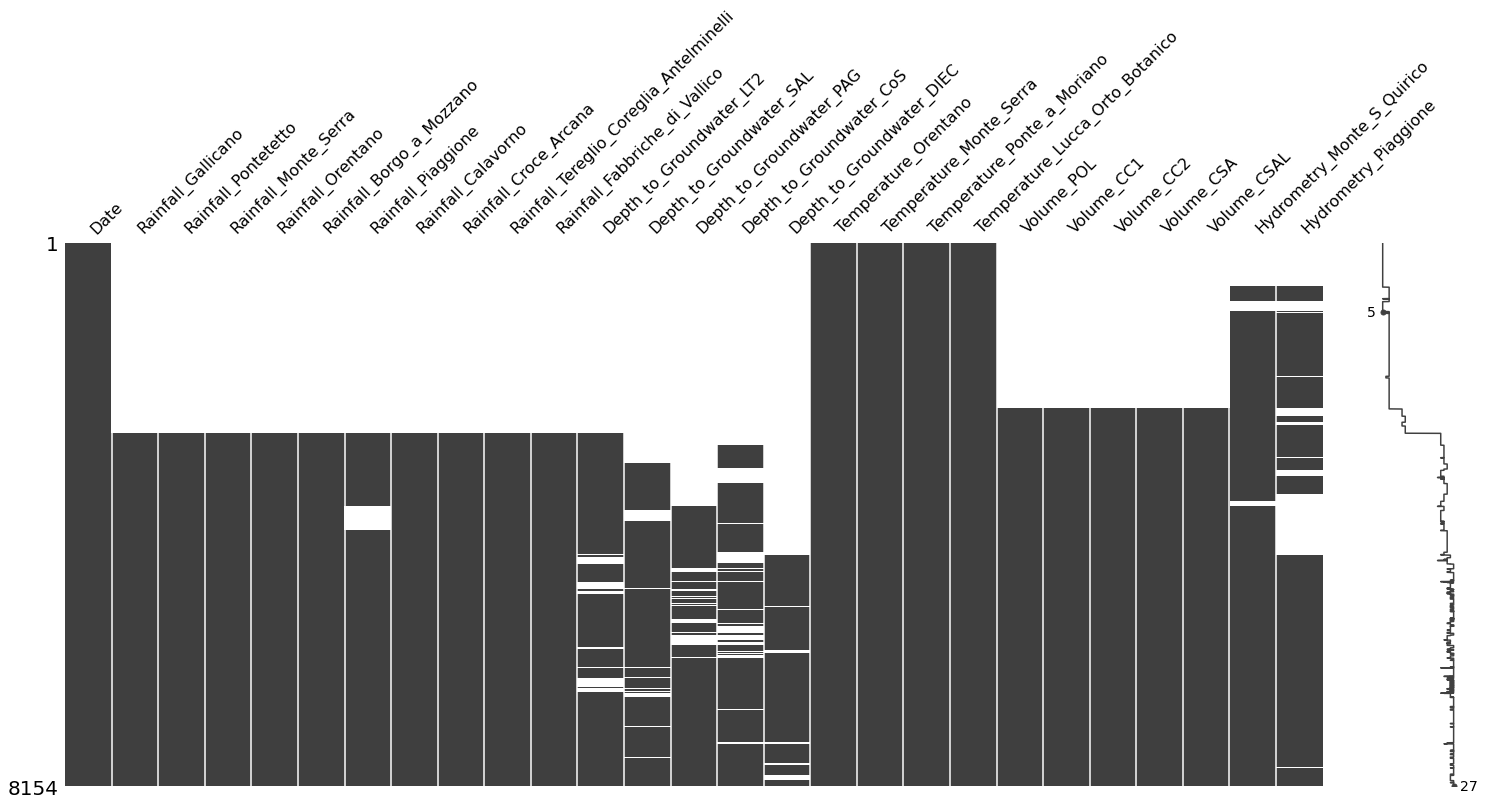

In [8]:
msno.matrix(auser)

In [9]:
col_names=pd.Series(auser.columns)
col_names

0                                        Date
1                          Rainfall_Gallicano
2                         Rainfall_Pontetetto
3                        Rainfall_Monte_Serra
4                           Rainfall_Orentano
5                    Rainfall_Borgo_a_Mozzano
6                          Rainfall_Piaggione
7                          Rainfall_Calavorno
8                       Rainfall_Croce_Arcana
9     Rainfall_Tereglio_Coreglia_Antelminelli
10              Rainfall_Fabbriche_di_Vallico
11                   Depth_to_Groundwater_LT2
12                   Depth_to_Groundwater_SAL
13                   Depth_to_Groundwater_PAG
14                   Depth_to_Groundwater_CoS
15                  Depth_to_Groundwater_DIEC
16                       Temperature_Orentano
17                    Temperature_Monte_Serra
18                Temperature_Ponte_a_Moriano
19            Temperature_Lucca_Orto_Botanico
20                                 Volume_POL
21                                

In [10]:
auser['Date']=pd.to_datetime(auser['Date'],format='%d/%m/%Y')
auser.set_index('Date',inplace=True)

numpy.ndarray

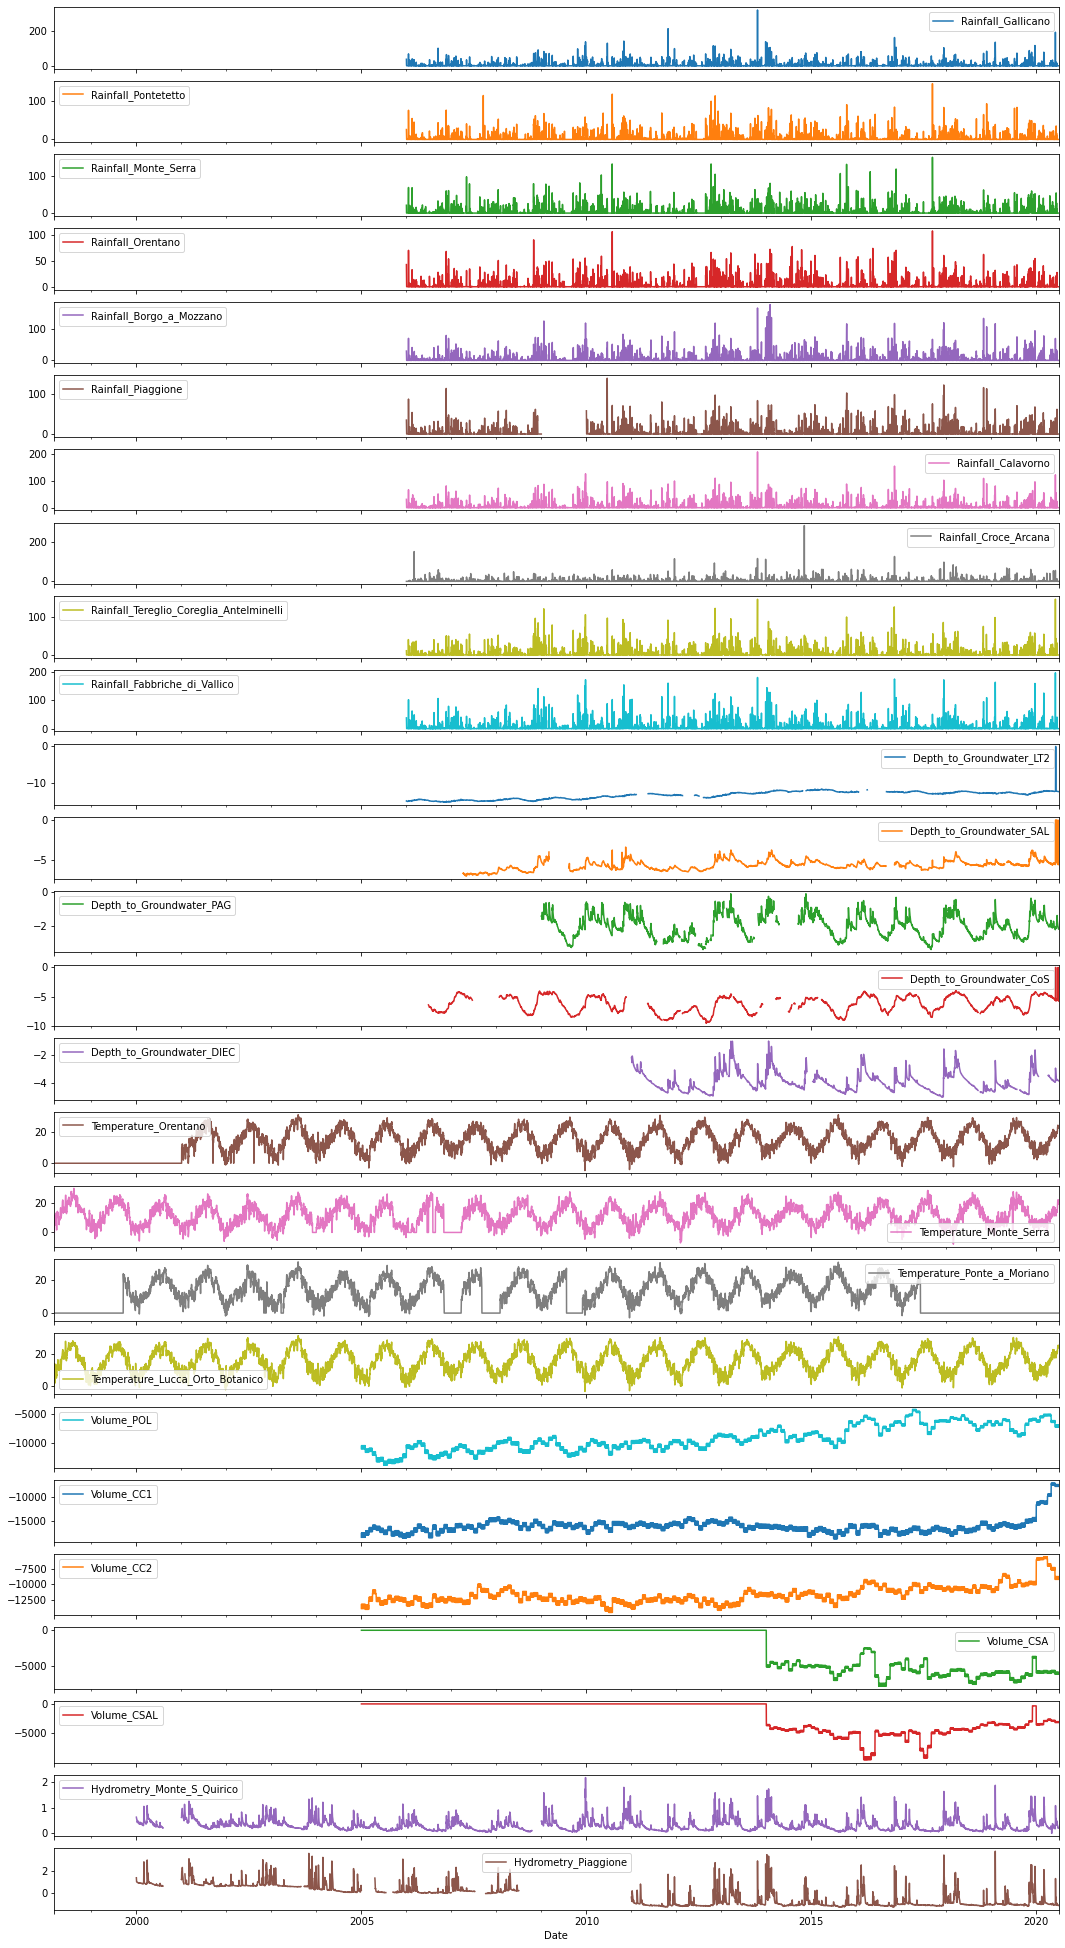

In [11]:
axes = auser.plot.line(subplots=True,figsize=(18,35))
type(axes)

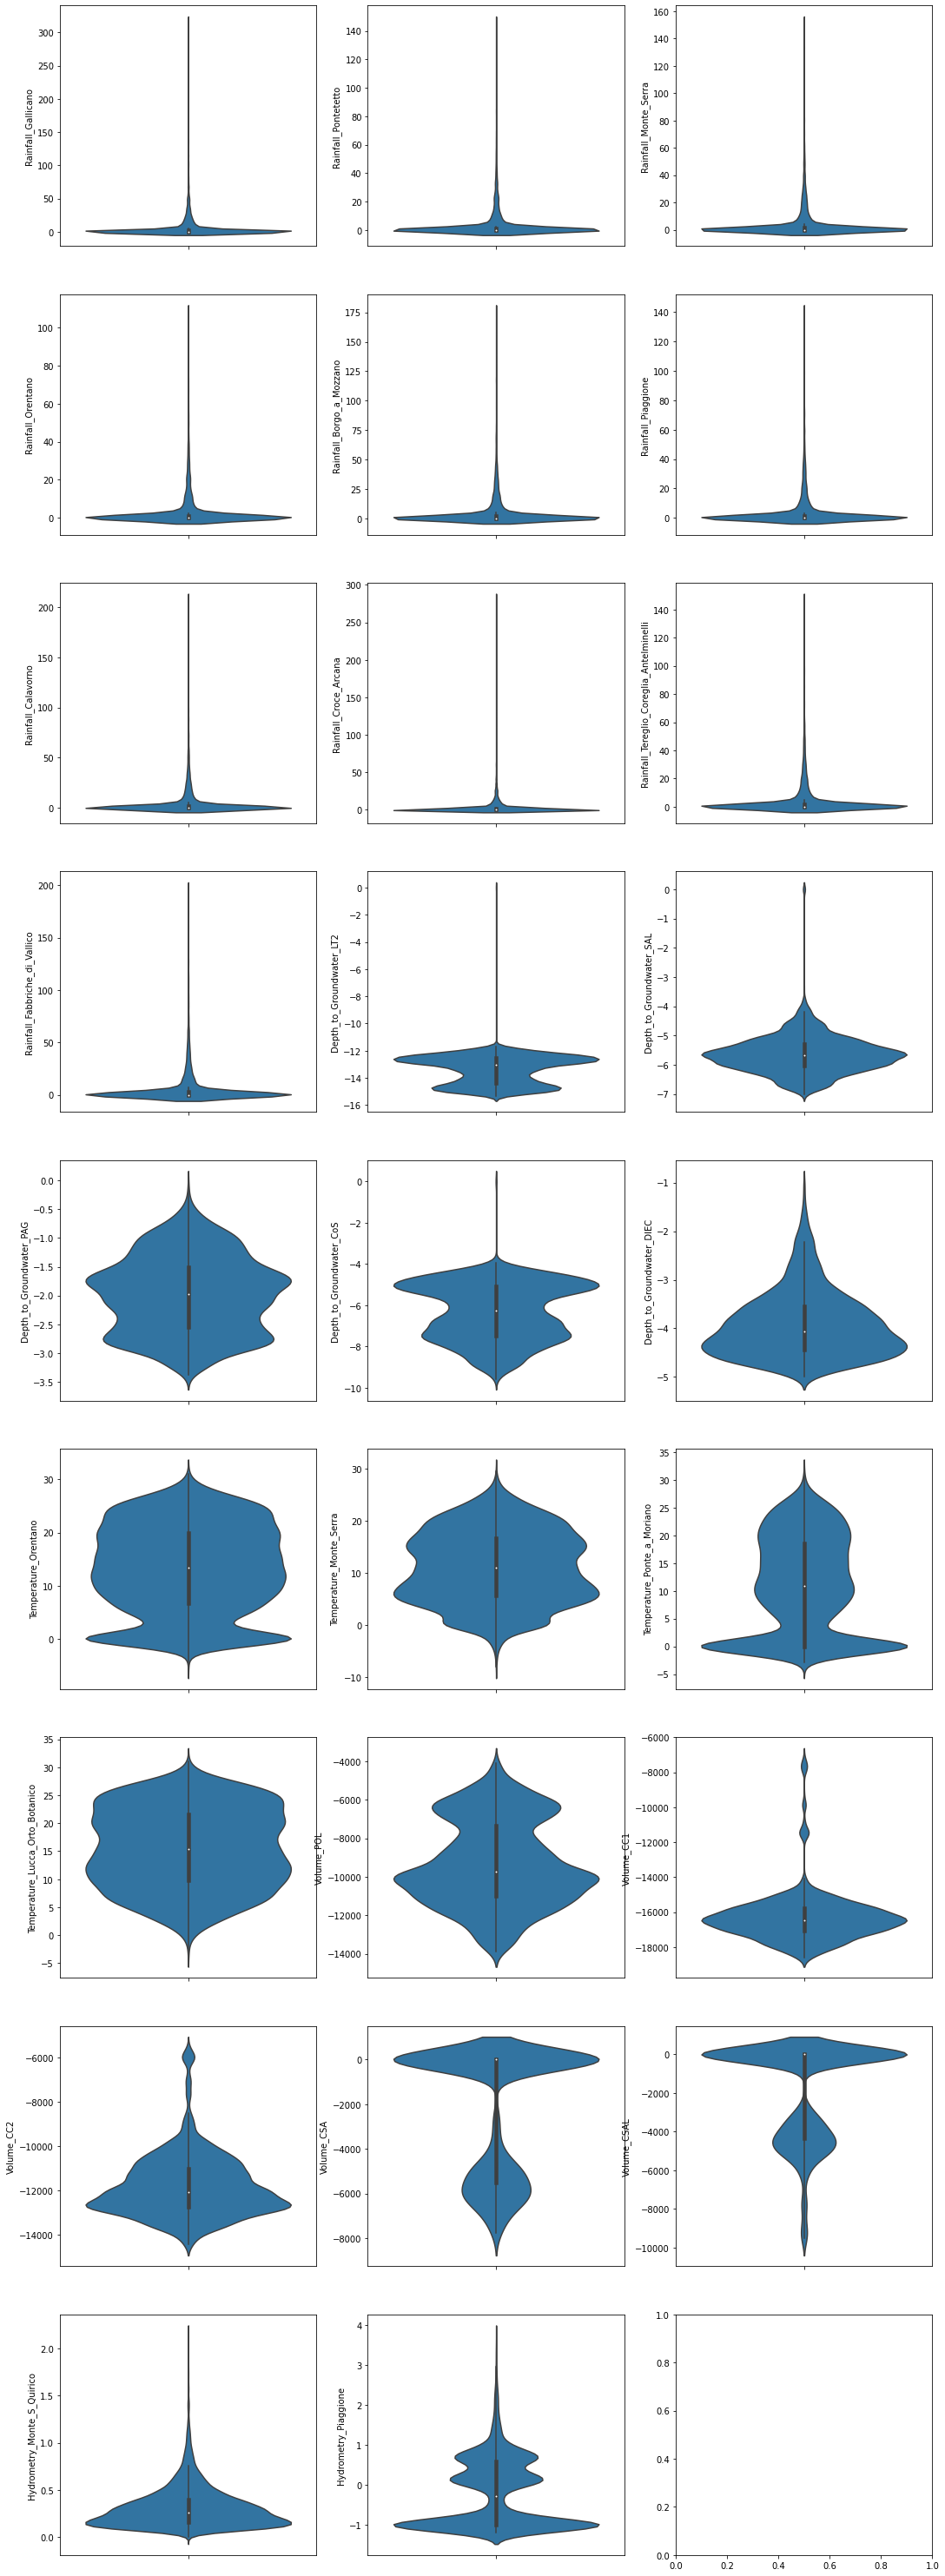

In [12]:
row_num=((len(col_names)-1)//3)+1
fig, ax = pyplot.subplots(nrows=row_num,ncols=3,figsize =(18, row_num*6))   
ax1=ax.flatten()
for i,t in enumerate(col_names[1:]):
    sns.violinplot(ax=ax1[i],y=t, data=auser) 
    